<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Donation-Statistics-by-Occupation-and-Employer" data-toc-modified-id="Donation-Statistics-by-Occupation-and-Employer-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Donation Statistics by Occupation and Employer</a></span></li><li><span><a href="#Bucketing-Donation-Amounts" data-toc-modified-id="Bucketing-Donation-Amounts-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Bucketing Donation Amounts</a></span></li><li><span><a href="#Donation-Statistics-by-State" data-toc-modified-id="Donation-Statistics-by-State-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Donation Statistics by State</a></span></li></ul></div>

The US Federal Election Commission publishes data on contributions to political campaigns. This includes contributor names, occupation and employer, address, and contribution amount. An interesting dataset is from the 2012 US presidential election. 

In [0]:
! wget -qnc -P ./datasets/fec/ https://raw.githubusercontent.com/wesm/pydata-book/2nd-edition/datasets/fec/P00000001-ALL.csv

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
fec = pd.read_csv("./datasets/fec/P00000001-ALL.csv", low_memory=False)
fec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001731 entries, 0 to 1001730
Data columns (total 16 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   cmte_id            1001731 non-null  object 
 1   cand_id            1001731 non-null  object 
 2   cand_nm            1001731 non-null  object 
 3   contbr_nm          1001731 non-null  object 
 4   contbr_city        1001712 non-null  object 
 5   contbr_st          1001727 non-null  object 
 6   contbr_zip         1001620 non-null  object 
 7   contbr_employer    988002 non-null   object 
 8   contbr_occupation  993301 non-null   object 
 9   contb_receipt_amt  1001731 non-null  float64
 10  contb_receipt_dt   1001731 non-null  object 
 11  receipt_desc       14166 non-null    object 
 12  memo_cd            92482 non-null    object 
 13  memo_text          97770 non-null    object 
 14  form_tp            1001731 non-null  object 
 15  file_num           1001731 non-n

In [4]:
fec.iloc[123456]

cmte_id                             C00431445
cand_id                             P80003338
cand_nm                         Obama, Barack
contbr_nm                         ELLMAN, IRA
contbr_city                             TEMPE
contbr_st                                  AZ
contbr_zip                          852816719
contbr_employer      ARIZONA STATE UNIVERSITY
contbr_occupation                   PROFESSOR
contb_receipt_amt                          50
contb_receipt_dt                    01-DEC-11
receipt_desc                              NaN
memo_cd                                   NaN
memo_text                                 NaN
form_tp                                 SA17A
file_num                               772372
Name: 123456, dtype: object

In [5]:
unique_cands = fec.cand_nm.unique()
unique_cands

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick',
       'Cain, Herman', 'Gingrich, Newt', 'McCotter, Thaddeus G',
       'Huntsman, Jon', 'Perry, Rick'], dtype=object)

In [0]:
parties = {'Bachmann, Michelle': 'Republican',
    'Cain, Herman': 'Republican',
    'Gingrich, Newt': 'Republican',
    'Huntsman, Jon': 'Republican',
    'Johnson, Gary Earl': 'Republican',
    'McCotter, Thaddeus G': 'Republican',
    'Obama, Barack': 'Democrat',
    'Paul, Ron': 'Republican',
    'Pawlenty, Timothy': 'Republican',
    'Perry, Rick': 'Republican',
    "Roemer, Charles E. 'Buddy' III": 'Republican',
    'Romney, Mitt': 'Republican',
    'Santorum, Rick': 'Republican'
}

In [7]:
fec.cand_nm[123456:123461]

123456    Obama, Barack
123457    Obama, Barack
123458    Obama, Barack
123459    Obama, Barack
123460    Obama, Barack
Name: cand_nm, dtype: object

In [8]:
fec.cand_nm[123456:123461].map(parties)

123456    Democrat
123457    Democrat
123458    Democrat
123459    Democrat
123460    Democrat
Name: cand_nm, dtype: object

In [0]:
# adding it as a column

fec['party'] = fec.cand_nm.map(parties)

In [10]:
fec['party'].value_counts()

Democrat      593746
Republican    407985
Name: party, dtype: int64

In [11]:
# number of contributions and refunds

(fec.contb_receipt_amt > 0).value_counts()

True     991475
False     10256
Name: contb_receipt_amt, dtype: int64

In [0]:
# taking only contributions rows

fec = fec[fec.contb_receipt_amt > 0]

In [0]:
# making a seperate subset of only Barack Obama and Mitt Romney

fec_mrbo = fec[fec.cand_nm.isin(['Obama, Barack', 'Romney, Mitt'])]

# Donation Statistics by Occupation and Employer

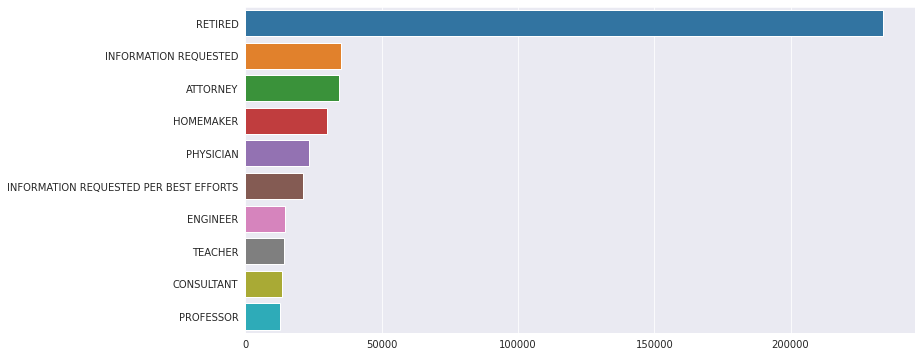

In [14]:
 plt.figure(figsize=(12, 6))
 top_10_donor_occ = fec.contbr_occupation.value_counts().head(10)
 _ = sns.barplot(top_10_donor_occ.values, top_10_donor_occ.index)

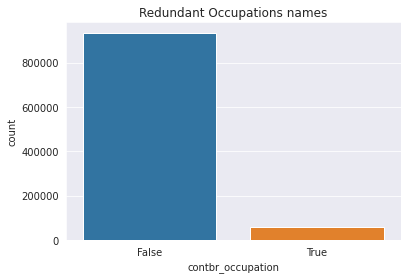

In [15]:
redundant_data = fec.contbr_occupation.isin([
    'INFORMATION REQUESTED PER BEST EFFORTS',
    'INFORMATION REQUESTED',
    'INFORMATION REQUESTED (BEST EFFORTS)'
])

_ = sns.countplot(redundant_data)
_ = plt.title("Redundant Occupations names")

In [0]:
occ_mapping = {
 'INFORMATION REQUESTED PER BEST EFFORTS' : 'NOT PROVIDED',
 'INFORMATION REQUESTED' : 'NOT PROVIDED',
 'INFORMATION REQUESTED (BEST EFFORTS)' : 'NOT PROVIDED',
 'C.E.O.': 'CEO'
}
# If no mapping provided, return x
f = lambda x: occ_mapping.get(x, x)
fec.contbr_occupation = fec.contbr_occupation.map(f)

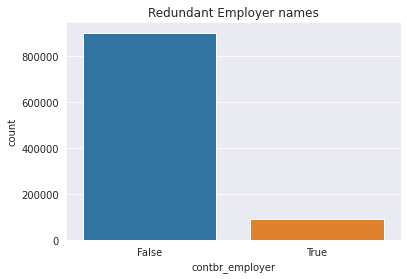

In [17]:
redundant_data = fec.contbr_employer.isin([
    'INFORMATION REQUESTED PER BEST EFFORTS',
    'INFORMATION REQUESTED',
    'SELF',
    'SELF EMPLOYED'                 
])

_ = sns.countplot(redundant_data)
_ = plt.title("Redundant Employer names")

In [0]:
# same thing for employers


emp_mapping = {
 'INFORMATION REQUESTED PER BEST EFFORTS' : 'NOT PROVIDED',
 'INFORMATION REQUESTED' : 'NOT PROVIDED',
 'SELF' : 'SELF-EMPLOYED',
 'SELF EMPLOYED' : 'SELF-EMPLOYED',
}
# If no mapping provided, return x
f = lambda x: emp_mapping.get(x, x)
fec.contbr_employer = fec.contbr_employer.map(f)

In [0]:
# aggregate data by party and occupation and donation over $2 million overall

by_occupation = fec.pivot_table(values='contb_receipt_amt',
                                index='contbr_occupation',
                                columns='party',
                                aggfunc='sum')

In [20]:
by_occupation

party,Democrat,Republican
contbr_occupation,,
MIXED-MEDIA ARTIST / STORYTELLER,100.0,NaN
AREA VICE PRESIDENT,250.0,NaN
RESEARCH ASSOCIATE,100.0,NaN
TEACHER,500.0,NaN
THERAPIST,3900.0,NaN
...,...,...
ZOOKEEPER,35.0,NaN
ZOOLOGIST,400.0,NaN
ZOOLOGY EDUCATION,25.0,NaN


In [0]:
over_2mm = by_occupation[by_occupation.sum(1) > 2000000]

In [22]:
over_2mm

party,Democrat,Republican
contbr_occupation,,
ATTORNEY,11141982.97,7.477194e+06
CEO,2074974.79,4.211041e+06
CONSULTANT,2459912.71,2.544725e+06
ENGINEER,951525.55,1.818374e+06
EXECUTIVE,1355161.05,4.138850e+06
HOMEMAKER,4248875.80,1.363428e+07
INVESTOR,884133.00,2.431769e+06
LAWYER,3160478.87,3.912243e+05
MANAGER,762883.22,1.444532e+06


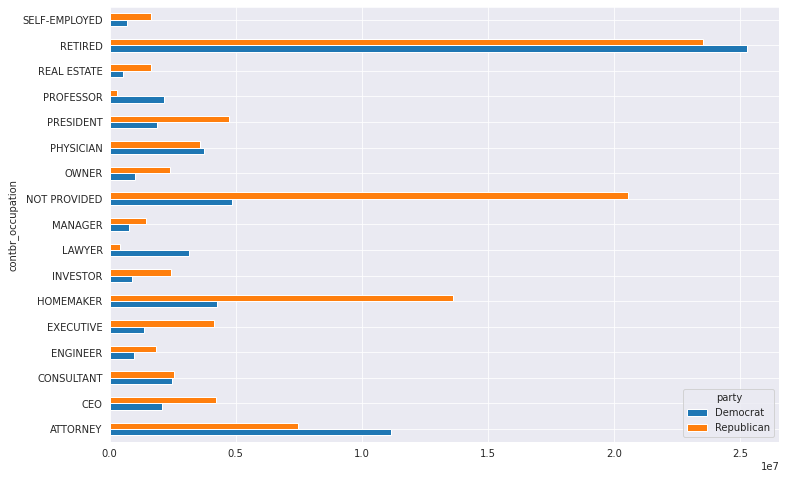

In [23]:
_ = over_2mm.plot(kind='barh', figsize=(12, 8))

top donor occupations or top companies that donated
to Obama and Romney

In [0]:
def get_top_amounts(group, key, n=5):
    totals = group.groupby(key)['contb_receipt_amt'].sum()
    return totals.nlargest(n)

In [25]:
# Then aggregate by occupation and employer:

grouped = fec_mrbo.groupby('cand_nm')

grouped.apply(get_top_amounts, 'contbr_occupation', n=7)

cand_nm        contbr_occupation                     
Obama, Barack  RETIRED                                   25305116.38
               ATTORNEY                                  11141982.97
               INFORMATION REQUESTED                      4866973.96
               HOMEMAKER                                  4248875.80
               PHYSICIAN                                  3735124.94
               LAWYER                                     3160478.87
               CONSULTANT                                 2459912.71
Romney, Mitt   RETIRED                                   11508473.59
               INFORMATION REQUESTED PER BEST EFFORTS    11396894.84
               HOMEMAKER                                  8147446.22
               ATTORNEY                                   5364718.82
               PRESIDENT                                  2491244.89
               EXECUTIVE                                  2300947.03
               C.E.O.                            

In [26]:
grouped.apply(get_top_amounts, 'contbr_employer', n=10)

cand_nm        contbr_employer                       
Obama, Barack  RETIRED                                   22694358.85
               SELF-EMPLOYED                             17080985.96
               NOT EMPLOYED                               8586308.70
               INFORMATION REQUESTED                      5053480.37
               HOMEMAKER                                  2605408.54
               SELF                                       1076531.20
               SELF EMPLOYED                               469290.00
               STUDENT                                     318831.45
               VOLUNTEER                                   257104.00
               MICROSOFT                                   215585.36
Romney, Mitt   INFORMATION REQUESTED PER BEST EFFORTS    12059527.24
               RETIRED                                   11506225.71
               HOMEMAKER                                  8147196.22
               SELF-EMPLOYED                     

# Bucketing Donation Amounts


In [0]:
bins = np.array([0, 1, 10, 100, 1000, 10000, 
                 100000, 1000000, 10000000])

In [28]:
labels = pd.cut(fec_mrbo.contb_receipt_amt, bins)
labels

411         (10, 100]
412       (100, 1000]
413       (100, 1000]
414         (10, 100]
415         (10, 100]
             ...     
701381      (10, 100]
701382    (100, 1000]
701383        (1, 10]
701384      (10, 100]
701385    (100, 1000]
Name: contb_receipt_amt, Length: 694282, dtype: category
Categories (8, interval[int64]): [(0, 1] < (1, 10] < (10, 100] < (100, 1000] < (1000, 10000] <
                                  (10000, 100000] < (100000, 1000000] < (1000000, 10000000]]

We can then group the data for Obama and Romney by name and bin label to get a histogram by donation size

In [0]:
grouped = fec_mrbo.groupby(['cand_nm', labels])

In [30]:
grouped.size().unstack(0)

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",493,77
"(1, 10]",40070,3681
"(10, 100]",372280,31853
"(100, 1000]",153991,43357
"(1000, 10000]",22284,26186
"(10000, 100000]",2,1
"(100000, 1000000]",3,0
"(1000000, 10000000]",4,0


sum the contribution amounts and normalize within
buckets to visualize percentage of total donations of each size by candidate

In [31]:
bucket_sums = grouped.contb_receipt_amt.sum().unstack(0)
bucket_sums

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",318.24,77.00
"(1, 10]",337267.62,29819.66
"(10, 100]",20288981.41,1987783.76
"(100, 1000]",54798531.46,22363381.69
"(1000, 10000]",51753705.67,63942145.42
"(10000, 100000]",59100.00,12700.00
"(100000, 1000000]",1490683.08,NaN
"(1000000, 10000000]",7148839.76,NaN


In [32]:
normed_sums = bucket_sums.div(bucket_sums.sum(axis=1), axis=0)
normed_sums

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",0.805182,0.194818
"(1, 10]",0.918767,0.081233
"(10, 100]",0.910769,0.089231
"(100, 1000]",0.710176,0.289824
"(1000, 10000]",0.447326,0.552674
"(10000, 100000]",0.823120,0.176880
"(100000, 1000000]",1.000000,NaN
"(1000000, 10000000]",1.000000,NaN


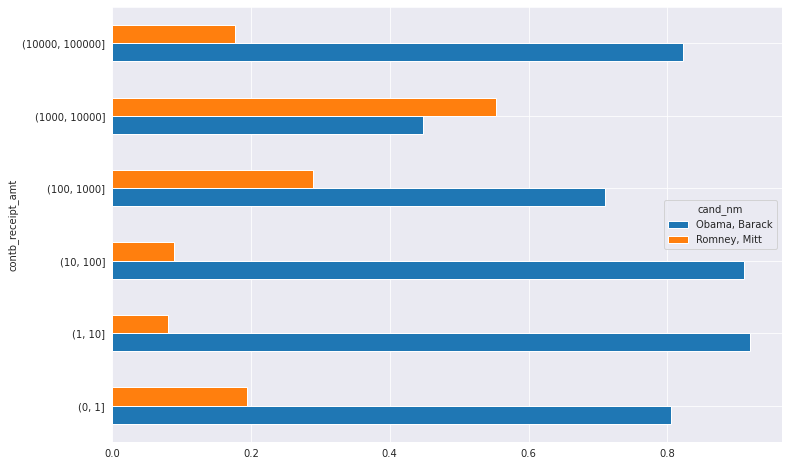

In [33]:
 normed_sums[:-2].plot(kind='barh', figsize=(12, 8))

# Donation Statistics by State


In [0]:
grouped = fec_mrbo.groupby(['cand_nm', 'contbr_st'])
totals = grouped.contb_receipt_amt.sum().unstack(0).fillna(0)
totals = totals[totals.sum(1) > 100000]

In [35]:
totals.head(10)

cand_nm,"Obama, Barack","Romney, Mitt"
contbr_st,,
AK,281840.15,86204.24
AL,543123.48,527303.51
AR,359247.28,105556.00
AZ,1506476.98,1888436.23
CA,23824984.24,11237636.60
CO,2132429.49,1506714.12
CT,2068291.26,3499475.45
DC,4373538.80,1025137.50
DE,336669.14,82712.00


In [0]:
percent = totals.div(totals.sum(1), axis=0)

In [37]:
data = percent.reset_index().melt(id_vars='contbr_st')
data.columns

Index(['contbr_st', 'cand_nm', 'value'], dtype='object')

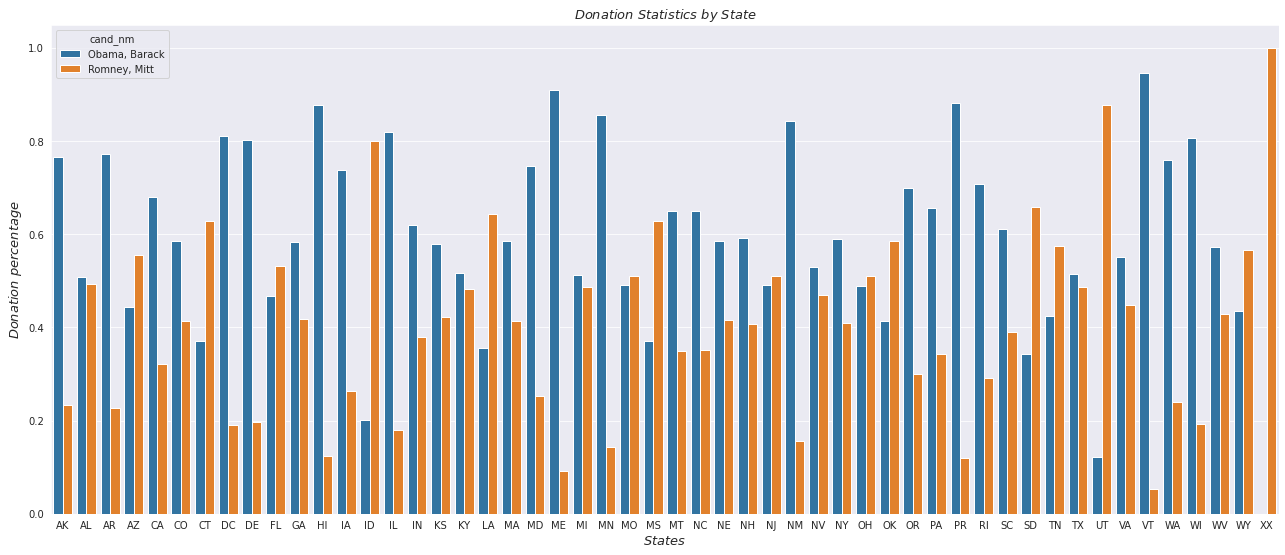

In [38]:
plt.figure(figsize=(22, 9))

_ = sns.barplot(x='contbr_st', y='value', hue='cand_nm', data=data)
_ = plt.title("$Donation$ $Statistics$ $by$ $State$", fontsize=13)
_ = plt.xlabel("$States$", fontsize=13)
_ = plt.ylabel("$Donation$ $percentage$", fontsize=13)